<a href="https://colab.research.google.com/github/agungrizkysetiawan/PCVK-Ganjil_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Agung Rizky S

Kelas : TI-3C

Modul 5

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TUGAS PRAKTIKUM

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


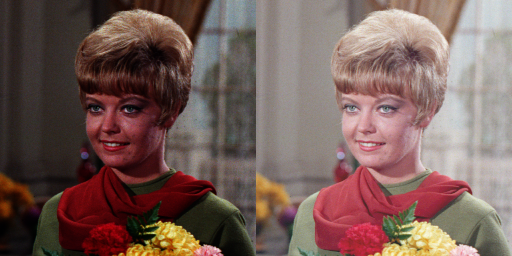

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

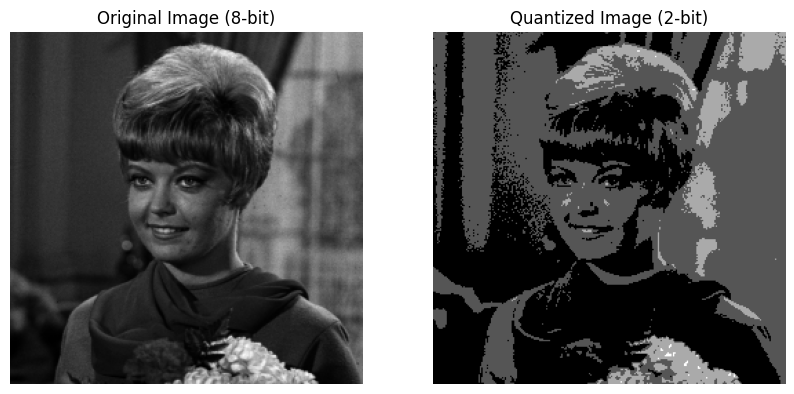

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Variabel bit depth
bit_depth = 2  # Ubah ini ke 2, 4, 7, atau 8 untuk kedalaman bit berbeda
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar grayscale
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)

# Buat citra dengan kedalaman tertentu (quantization)
depth_image = np.zeros(original.shape, original.dtype)

# Mengkuantisasi gambar berdasarkan bit depth
depth_image = np.round(original / level) * level

# Menampilkan gambar asli dan gambar hasil kuantisasi
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original Image (8-bit)')
ax[0].axis('off')

ax[1].imshow(depth_image, cmap='gray')
ax[1].set_title(f'Quantized Image ({bit_depth}-bit)')
ax[1].axis('off')

plt.show()


3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).


In [ ]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/'):
 n= cv.imread(img)
 cv_img.append(n)
